In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [18]:
path=r"C:\Users\ranji\Downloads\Submitted tasks\Python_5\Instacart\Instacart-Basket-Analysis"

In [19]:
ords_prods_merge=pd.read_pickle(os.path.join(path,"02 Data","Prepared Data","orders_products_merged_updated_2.pkl"))

<Axes: >

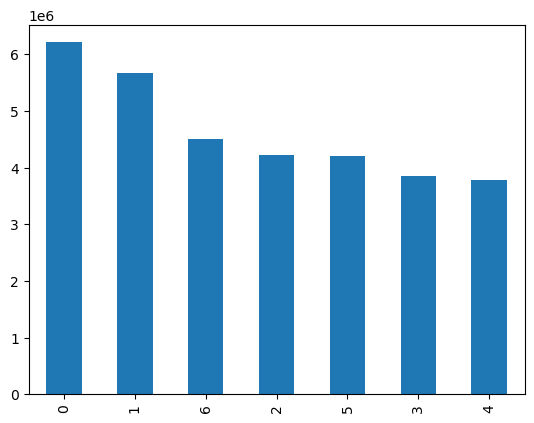

In [20]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

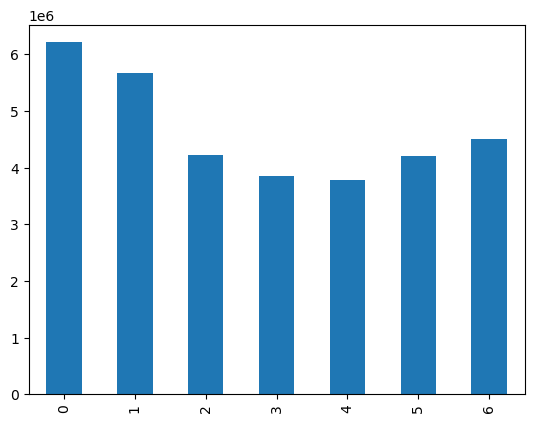

In [21]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

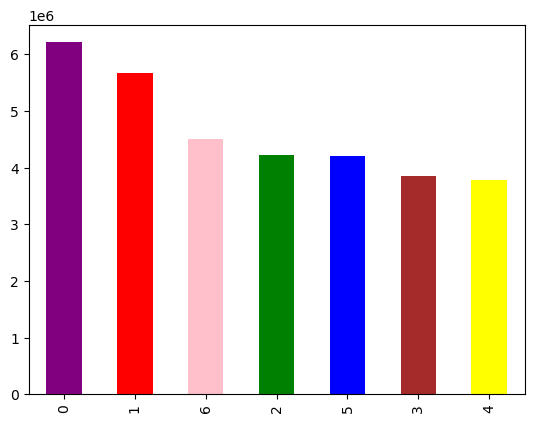

In [22]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'green', 'blue', 'brown', 'yellow' ])

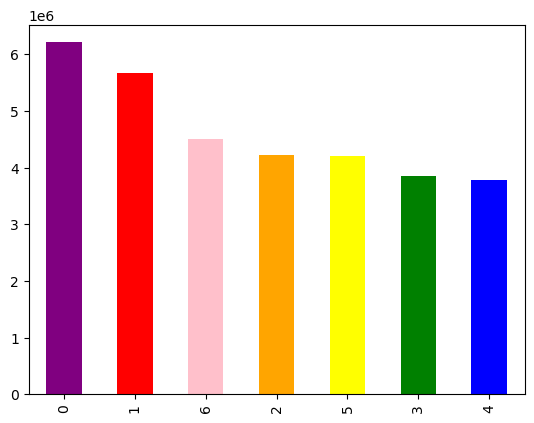

In [23]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [24]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

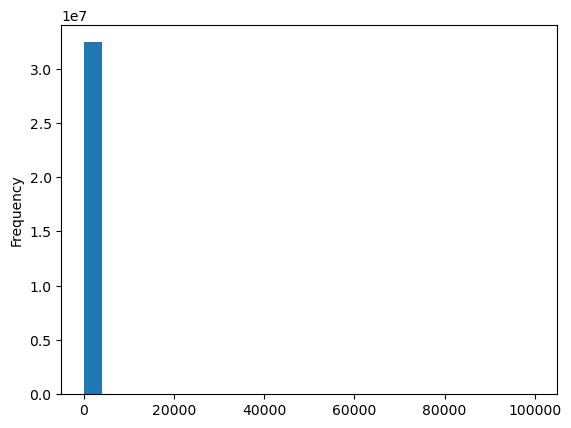

In [25]:
ords_prods_merge['prices'].plot.hist(bins = 25)
#A smaller number of bins equates to denser bars, while a larger number of bins equates to sparser bars.

In [26]:
ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

#there is something odd in the maximum value, To further investigate, conduct a few checks for each specific statistic

In [27]:
ords_prods_merge['prices'].mean()

11.98114392296625

In [28]:
ords_prods_merge['prices'].median()

7.4

In [30]:
ords_prods_merge['prices'].max()

99999.0

In [ ]:
#the mean and median are between 7 and 12,max= $99,999.00?
#This must be the result of data corruption or some kind of special value within the data. 
#you’d use scatterplots to investigate the relationship between two variables

<Axes: xlabel='prices', ylabel='prices'>

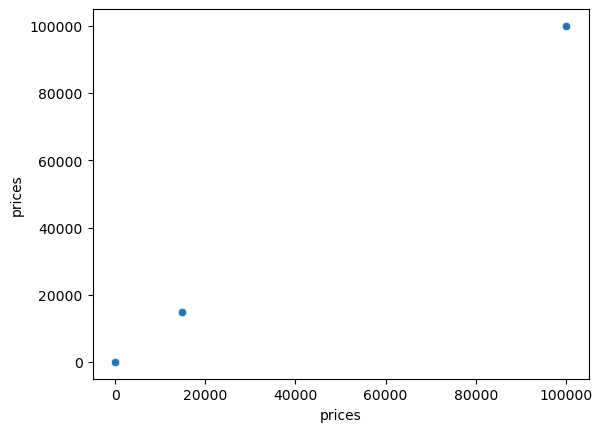

In [31]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [32]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]
#If the maximum price anyone would pay in a supermarket were around $100, 
#then anything above that amount could be considered an outlier.

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Regularly busy,Regularly busy,Most orders
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Regularly busy,Regularly busy,Most orders
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Regularly busy,Regularly busy,Average orders
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Busiest day,Busiest days,Average orders
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,Regularly busy,Busiest days,Average orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193268,2249946,204099,prior,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,both,Busiest day,Busiest days,Average orders
29193269,2363282,204099,prior,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,both,Busiest day,Busiest days,Most orders
29193270,3181945,204395,prior,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,both,Regularly busy,Least busy days,Most orders
29193271,2486215,205227,prior,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,both,Regularly busy,Least busy days,Average orders


In [33]:
#let’s mark them as missing since they don’t make sense in terms of the other values in the column. 
To turn them into NaNs, use the following code:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [34]:
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

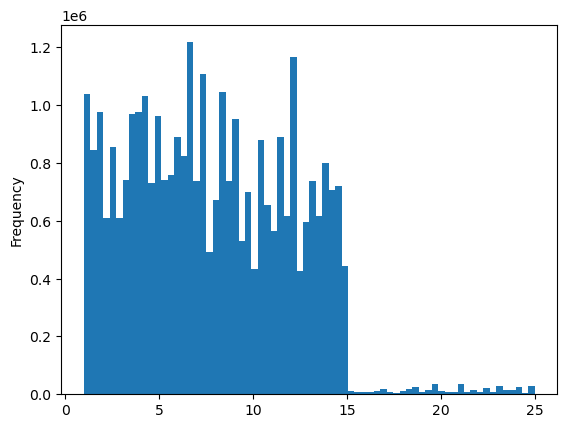

In [36]:
ords_prods_merge['prices'].plot.hist(bins = 70)
#let’s retry that histogram of your “prices” column:

In [38]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

In [39]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [40]:
dev

array([False,  True, False, ..., False,  True,  True])

In [42]:
np.random.rand(10)

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981])